In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [7]:
df=pd.read_csv("Social_Network_Ads.csv")


In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
df.drop('User ID',axis=1,inplace=True)

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [14]:
if df['Gender'].dtype == 'O':
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [15]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [16]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [17]:
x=df[['Gender', 'Age', 'EstimatedSalary']]
y=df['Purchased']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [20]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [24]:
# 8. Elbow method: find best K
k_values = range(1, 21)  # try K from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"K = {k:2d} -> Accuracy = {acc:.4f}")

K =  1 -> Accuracy = 0.8625
K =  2 -> Accuracy = 0.8375
K =  3 -> Accuracy = 0.9000
K =  4 -> Accuracy = 0.9125
K =  5 -> Accuracy = 0.9000
K =  6 -> Accuracy = 0.9000
K =  7 -> Accuracy = 0.9000
K =  8 -> Accuracy = 0.9000
K =  9 -> Accuracy = 0.9000
K = 10 -> Accuracy = 0.9000
K = 11 -> Accuracy = 0.9000
K = 12 -> Accuracy = 0.9000
K = 13 -> Accuracy = 0.9000
K = 14 -> Accuracy = 0.9000
K = 15 -> Accuracy = 0.9000
K = 16 -> Accuracy = 0.9125
K = 17 -> Accuracy = 0.9125
K = 18 -> Accuracy = 0.9000
K = 19 -> Accuracy = 0.9000
K = 20 -> Accuracy = 0.8375


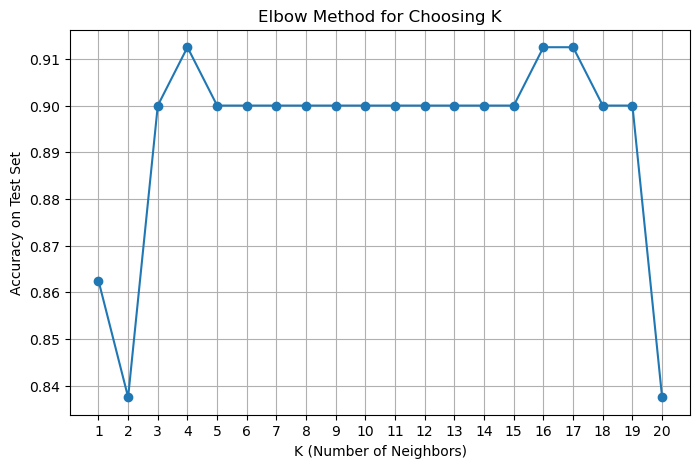

In [25]:
# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.title("Elbow Method for Choosing K")
plt.grid(True)
plt.show()

In [26]:
best_k = k_values[int(np.argmax(accuracies))]
print(f"\nBest K based on accuracy: {best_k}")


Best K based on accuracy: 4


In [29]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
y_pred = knn_final.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [33]:
print(accuracy_score(y_test,y_pred))

0.9125


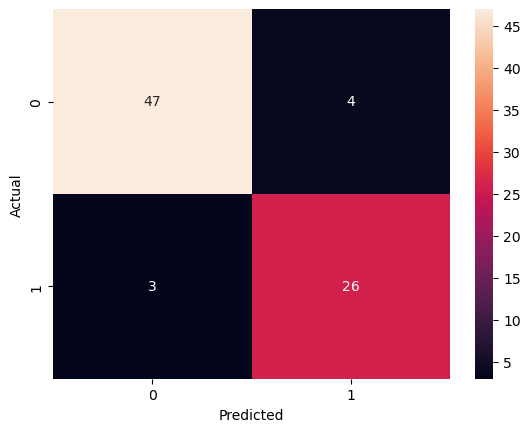

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.87      0.90      0.88        29

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [37]:
new_data = pd.DataFrame({
    'Gender': [1],         # 1 = Female
    'Age': [30],
    'EstimatedSalary': [60000]
})

In [39]:
# Scale using the same scaler
new_data_scaled = scalar.transform(new_data)

new_pred = knn_final.predict(new_data_scaled)
print("\nPrediction for [Female, 30 years, 60000 salary]:", new_pred[0])
print("=> 1 means Purchased, 0 means Not Purchased")


Prediction for [Female, 30 years, 60000 salary]: 0
=> 1 means Purchased, 0 means Not Purchased
